**Course Module**: *Advanced Deep Learning and Computer Vision *

**Project**: Perform Facial Recognition with Deep Learning in Keras Using CNN

**Submitted By**: Kajal Mishra


In [ ]:
# Data science libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools

#Scikit-learn libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve,auc

#Keras API Tensorflow 2 libraries
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Activation, LeakyReLU
from keras.layers.noise import AlphaDropout
from tensorflow.keras.optimizers import Adam

from keras.utils.generic_utils import get_custom_objects
from keras import backend as K
from keras.callbacks import TensorBoard
from keras.utils.np_utils import to_categorical

print('Tensorflow version:', tf.__version__)

Tensorflow version: 2.6.0


In [ ]:
df = np.load('ORL_faces.npz') #loading dataset

In [ ]:
# Loading train and test dataset (data is already split into)
x_train = df['trainX']
y_train = df['trainY']
x_test = df['testX']
y_test = df['testY']

In [ ]:
df['testX']

array([[ 41.,  47.,  47., ...,  35.,  37.,  38.],
       [ 44.,  43.,  32., ...,  43.,  43.,  37.],
       [ 42.,  41.,  44., ...,  42.,  43.,  41.],
       ...,
       [101., 100., 103., ...,  31.,  40.,  42.],
       [105., 108., 106., ...,  44.,  40.,  47.],
       [113., 114., 111., ...,  62.,  81.,  89.]])

In [ ]:
df['testY']

array([ 0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  2,
        2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,
        4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,
        6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,
        8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10,
       10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12,
       12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14,
       14, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18, 18, 19,
       19, 19, 19, 19, 19, 19, 19], dtype=uint8)

In [ ]:
# Normalizing each image as each image is between 0-255 pixels
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0

print('Training dataset shape: ',x_train.shape)
print('Testing dataset shape: ',x_test.shape)

Training dataset shape:  (240, 10304)
Testing dataset shape:  (160, 10304)


In [ ]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train,y_train,test_size=0.1,random_state=42)

In [ ]:
# Shape of image definition
rows = 112
columns = 92
image_shape = (rows,columns,1)

In [ ]:
# Reshape function
x_train.shape


(216, 10304)

In [ ]:
x_train[0].shape

(10304,)

In [ ]:
x_train = x_train.reshape(x_train.shape[0],*image_shape)
x_test = x_test.reshape(x_test.shape[0],*image_shape)
x_valid = x_valid.reshape(x_valid.shape[0],*image_shape)

In [ ]:
print('Training dataset modified shape: ',x_train.shape)
print('Testing dataset modified shape: ',x_test.shape)
print('Validating dataset modified shape: ',x_valid.shape)

Training dataset modified shape:  (216, 112, 92, 1)
Testing dataset modified shape:  (160, 112, 92, 1)
Validating dataset modified shape:  (24, 112, 92, 1)


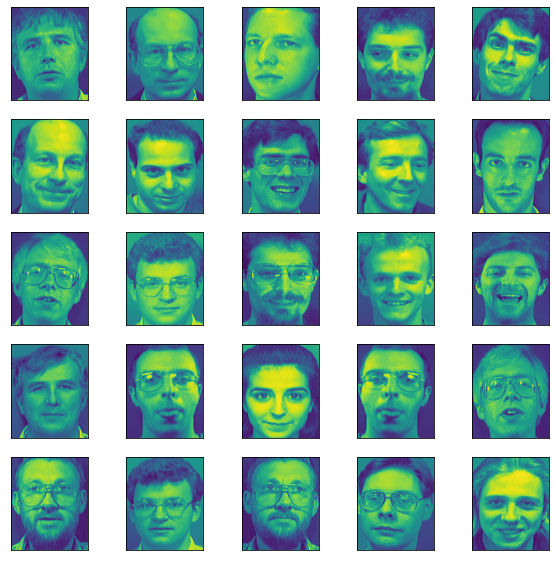

In [ ]:
#visualize some inages 5 x 5 grid images in gray scale
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i].squeeze())

plt.show()

In [ ]:
# We will initialize our cnn model with activation function, dropout rate, optimizer
def cnn_model(activation,
              dropout_rate,
              optimizer):
    
    model = Sequential() 
    
    if(activation == 'selu'):
        model.add(Conv2D(32, kernel_size=3,
                  activation=activation,
                  input_shape=image_shape,
                  kernel_initializer='lecun_normal')) 
        model.add(MaxPooling2D(pool_size=2))
        
        model.add(Conv2D(64, 3, activation=activation, 
                         kernel_initializer='lecun_normal')) 
        model.add(MaxPooling2D(pool_size=2)) 
        
        model.add(Flatten()) 
        model.add(Dense(2024, activation=activation, 
                        kernel_initializer='lecun_normal'))
        model.add(AlphaDropout(0.5))
        
        model.add(Dense(1024, activation=activation, 
                        kernel_initializer='lecun_normal'))
        model.add(AlphaDropout(0.5))
        
        model.add(Dense(512, activation=activation, 
                        kernel_initializer='lecun_normal'))
        model.add(AlphaDropout(0.5))
        
        model.add(Dense(20, activation='softmax')) #Output layer
    else:
        model.add(Conv2D(32, kernel_size=3,
                  activation=activation,
                  input_shape=image_shape)) 
        model.add(MaxPooling2D(pool_size=2)) 
        
        model.add(Conv2D(64,3, activation=activation)) 
        model.add(MaxPooling2D(pool_size=2)) 
        
        model.add(Flatten())
        
        model.add(Dense(2024, activation=activation))
        model.add(Dropout(0.5))
        model.add(Dense(1024, activation=activation))
        model.add(Dropout(0.5))
        model.add(Dense(512, activation=activation))
        model.add(Dropout(0.5))
        
        model.add(Dense(20, activation='softmax')) #Output layer
    
    model.compile(
        loss='sparse_categorical_crossentropy', 
        optimizer=optimizer, 
        metrics=['accuracy']
    ) 
    
    return model


In [ ]:
#For Leaky-Rely function we need to define aplha parameters using get_custom_objects
get_custom_objects().update({'leaky-relu':Activation(LeakyReLU(alpha=0.3))})

# Defining the type of activation functions to be tested
activation_function = ['relu', 'elu', 'leaky-relu','selu']

In [ ]:
#Building model and train for all chosen activation functions

#creating an empty matrix for storing results for activations
activation_results=[]

for activation in activation_function:
  print('\nTraining with {0} activation function\n'.format(activation))

  #using 'adam' optimizer with clipvalue of 0.5
  model=cnn_model(activation=activation,
                  dropout_rate=0.2,
                  optimizer=Adam(clipvalue=0.5))
  
  history=model.fit(np.array(x_train),
                    np.array(y_train),
                    batch_size=512,
                    epochs=75,
                    verbose=2,
                    validation_data=(np.array(x_valid),np.array(y_valid)))
  
  #store results
  activation_results.append(history)

  K.clear_session()
  del model
  
print(activation_results)



Training with relu activation function

Epoch 1/75
1/1 - 7s - loss: 3.0158 - accuracy: 0.0278 - val_loss: 3.2536 - val_accuracy: 0.0000e+00
Epoch 2/75
1/1 - 6s - loss: 3.9715 - accuracy: 0.0509 - val_loss: 3.2361 - val_accuracy: 0.0000e+00
Epoch 3/75
1/1 - 6s - loss: 3.7375 - accuracy: 0.0602 - val_loss: 2.9929 - val_accuracy: 0.0417
Epoch 4/75
1/1 - 6s - loss: 3.2970 - accuracy: 0.0787 - val_loss: 2.9961 - val_accuracy: 0.0417
Epoch 5/75
1/1 - 6s - loss: 3.0517 - accuracy: 0.0741 - val_loss: 2.9994 - val_accuracy: 0.0417
Epoch 6/75
1/1 - 5s - loss: 3.0217 - accuracy: 0.0880 - val_loss: 3.0029 - val_accuracy: 0.0417
Epoch 7/75
1/1 - 5s - loss: 3.0277 - accuracy: 0.0509 - val_loss: 3.0008 - val_accuracy: 0.0000e+00
Epoch 8/75
1/1 - 6s - loss: 2.9756 - accuracy: 0.0648 - val_loss: 3.0010 - val_accuracy: 0.1667
Epoch 9/75
1/1 - 5s - loss: 2.9980 - accuracy: 0.0741 - val_loss: 2.9975 - val_accuracy: 0.0833
Epoch 10/75
1/1 - 5s - loss: 2.9628 - accuracy: 0.0833 - val_loss: 2.9899 - val_acc

[0.0, 0.0, 0.0416666679084301, 0.0416666679084301, 0.0416666679084301, 0.0416666679084301, 0.0, 0.1666666716337204, 0.0833333358168602, 0.0833333358168602, 0.0833333358168602, 0.0833333358168602, 0.125, 0.1666666716337204, 0.1666666716337204, 0.125, 0.0833333358168602, 0.0833333358168602, 0.1666666716337204, 0.2083333283662796, 0.2083333283662796, 0.25, 0.25, 0.2916666567325592, 0.5416666865348816, 0.6666666865348816, 0.7083333134651184, 0.75, 0.8333333134651184, 0.8333333134651184, 0.8333333134651184, 0.8333333134651184, 0.8333333134651184, 0.875, 0.875, 0.9583333134651184, 0.9166666865348816, 0.9166666865348816, 0.9166666865348816, 0.9583333134651184, 1.0, 1.0, 1.0, 0.9166666865348816, 0.9583333134651184, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.0, 0.0416666679084301, 0.1666666716337204, 0.0, 0.0416666679084301, 0.0416666679084301, 0.0833333358168602, 0.0, 0.125, 0.41666665

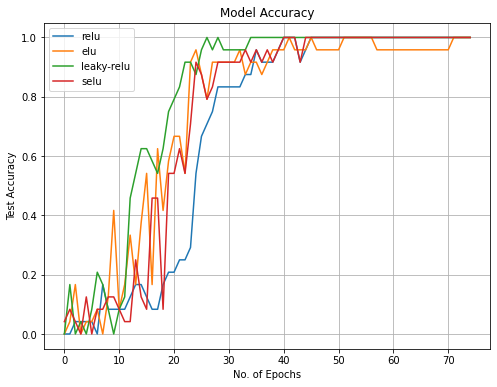

[3.2535884380340576, 3.236072540283203, 2.9928719997406006, 2.996100664138794, 2.9994401931762695, 3.0028908252716064, 3.000779390335083, 3.001002073287964, 2.9974746704101562, 2.9898903369903564, 2.982919931411743, 2.979558229446411, 2.9753997325897217, 2.9714596271514893, 2.9656665325164795, 2.9648208618164062, 2.964906930923462, 2.9277193546295166, 2.8624908924102783, 2.781987428665161, 2.681291341781616, 2.5634942054748535, 2.436336040496826, 2.2914459705352783, 2.099749803543091, 1.8626044988632202, 1.663866639137268, 1.407457947731018, 1.2086548805236816, 1.1126676797866821, 0.9613593220710754, 0.7894136905670166, 0.6601099967956543, 0.5246580243110657, 0.4215857982635498, 0.36254093050956726, 0.35835233330726624, 0.3101087212562561, 0.29363763332366943, 0.2148890346288681, 0.1892542690038681, 0.1460057944059372, 0.11360146850347519, 0.1273386925458908, 0.09542383998632431, 0.07193746417760849, 0.07588668167591095, 0.059885431081056595, 0.030862130224704742, 0.030153363943099976,

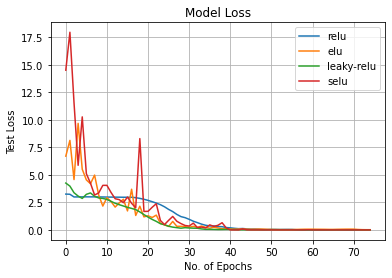

In [ ]:
# Lets try to plot the Model accuracy and Model loss for each activation function used above
# Just to make sure, we don't change the above data, so we store it in new matrix

activation_list=activation_function[0:]
results_new = activation_results[0:]

def plot_results(activation_results,activation_fun_new=[]):
  plt.figure(figsize=(8,6))

  # Model accuracy values plot
  for activation_function in activation_results:
    print(activation_function.history['val_accuracy'])
    plt.plot(activation_function.history['val_accuracy'])
  
  plt.title('Model Accuracy')
  plt.ylabel('Test Accuracy')
  plt.xlabel('No. of Epochs')
  plt.legend(activation_fun_new)
  plt.grid()
  plt.show()

  # Model loss values plot
  for activation_function in activation_results:
    print(activation_function.history['val_loss'])
    plt.plot(activation_function.history['val_loss'])
  
  plt.title('Model Loss')
  plt.ylabel('Test Loss')
  plt.xlabel('No. of Epochs')
  plt.legend(activation_fun_new)
  plt.grid()
  plt.show()



plot_results(results_new, activation_list)



Here it is seen that 'leaky-relu' and 'relu' both perform well with minimum loss at lower epochs as compared to other activation functions

Looking at the plots above all activation functions converge with minimum loss and high accuracy at training and validation set but 'leaky-relu' is able to converge for higher accuracy at lower epochs with minimum loss, so we choose 'leaky-relu' for final model training and plotting results.

In [ ]:
activation_func_final ='leaky-relu'

model_final = cnn_model(activation=activation_func_final,
                    dropout_rate=0.2,
                    optimizer=Adam(clipvalue=0.5)) #using 'adam' optimizer with clipvalue of 0.5

history_final = model_final.fit(np.array(x_train), np.array(y_train), 
                    batch_size=512,
                    epochs=75, 
                    verbose=2,
                    validation_data=(np.array(x_valid),np.array(y_valid)))

Epoch 1/75
1/1 - 8s - loss: 3.0355 - accuracy: 0.0370 - val_loss: 3.6409 - val_accuracy: 0.0000e+00
Epoch 2/75
1/1 - 6s - loss: 4.8292 - accuracy: 0.0463 - val_loss: 3.1009 - val_accuracy: 0.1667
Epoch 3/75
1/1 - 6s - loss: 5.4885 - accuracy: 0.0509 - val_loss: 3.0961 - val_accuracy: 0.0417
Epoch 4/75
1/1 - 5s - loss: 3.6640 - accuracy: 0.0926 - val_loss: 3.1128 - val_accuracy: 0.0000e+00
Epoch 5/75
1/1 - 6s - loss: 3.0237 - accuracy: 0.1065 - val_loss: 2.9792 - val_accuracy: 0.1250
Epoch 6/75
1/1 - 6s - loss: 3.4899 - accuracy: 0.0694 - val_loss: 2.9432 - val_accuracy: 0.2500
Epoch 7/75
1/1 - 6s - loss: 2.9478 - accuracy: 0.1528 - val_loss: 2.9861 - val_accuracy: 0.0833
Epoch 8/75
1/1 - 6s - loss: 2.7333 - accuracy: 0.2037 - val_loss: 2.9238 - val_accuracy: 0.0833
Epoch 9/75
1/1 - 6s - loss: 2.6798 - accuracy: 0.2176 - val_loss: 2.8649 - val_accuracy: 0.0833
Epoch 10/75
1/1 - 5s - loss: 2.6517 - accuracy: 0.2130 - val_loss: 2.7391 - val_accuracy: 0.1250
Epoch 11/75
1/1 - 6s - loss: 2.

In [ ]:
result_score = model_final.evaluate(np.array(x_test),np.array(y_test),verbose=0)

print('Test Loss {:.4f}'.format(result_score[0]))
print('Test Accuracy {:.4f}'.format(result_score[1]))

Test Loss 0.3499
Test Accuracy 0.9500


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


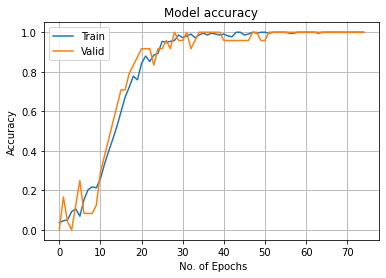

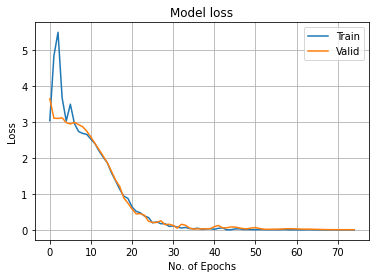

In [ ]:

# Data in history

print(history_final.history.keys())

# Plotting Accuracy for final model
plt.plot(history_final.history['accuracy'])
plt.plot(history_final.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel(' No. of Epochs')
plt.legend(['Train', 'Valid'])
plt.grid()
plt.show()

# Plotting Loss for Final Model
plt.plot(history_final.history['loss'])
plt.plot(history_final.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('No. of Epochs')
plt.legend(['Train', 'Valid'])
plt.grid()
plt.show()

**Conclusion: **

Here in this project we analyzed ORL faces images (train and test sets were given). We used CNN method to build the model and train it.

The analysis for different activation functions is fisrt observed to find that 'leaky-relu' activation function is one of the activation functions that can be used for out final model

The model training is done using x_train and y_train with validation data as x_valid and y_valid. owever for evaluating model, we use x_test and y_test which gives us loss ~0.2435 with an accuracy of 93.75%